# supervised learning, clustering

## In class

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_circles

In [0]:
def plot_clusters(points, cluster_labels, show_annotation=True):
  clusters = [[[], []] for i in range(len(np.unique(cluster_labels)))]
  for i in range(len(points)):
    clusters[int(cluster_labels[i])][0].append(points[i][0])
    clusters[int(cluster_labels[i])][1].append(points[i][1])
  
  for i in clusters:
    plt.scatter(i[0], i[1])

  if show_annotation == True:
    count = 0
    for i in points:
      plt.annotate(count, (i[0]+0.05, i[1]))
      count += 1

  plt.legend(np.unique(cluster_labels))

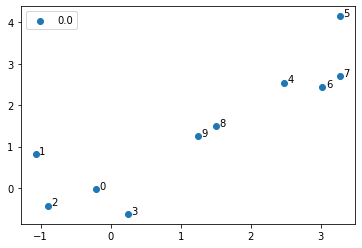

In [188]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))
cluster_labels = np.zeros(10)
plot_clusters(points, cluster_labels)
plt.show()

In [0]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

In [0]:
def initialise(points, k):
  # return K,2 array
  rind = np.random.choice(range(len(points)), k, replace=False)
  return np.array([points[i] for i in rind])

In [0]:
def assign(points, cluster_centers):
  cluster_labels = []
  for p in points:
    mdist = math.inf
    clust = -1
    for i in range(len(cluster_centers)):
      dist = math.sqrt((cluster_centers[i][0] - p[0])**2 + (cluster_centers[i][1] - p[1])**2)
      if dist < mdist:
        mdist = dist
        clust = i
    cluster_labels.append(clust)
  return np.array(cluster_labels)

In [192]:
# Testing
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))

# cluster_centers = initialise(points, 3)
# print(assign(points, cluster_centers))

np.random.seed(2)
cluster_centers = np.array([[0,0], [1,1], [2,2]])
cluster_labels = assign(points, cluster_centers)
print(cluster_labels)

[0 0 0 0 2 2 2 2 1 1]


In [0]:
def recalculate_cluster_centers(points, cluster_labels, k):
  cluster_centers = []
  for i in range(k):
    sump = [0, 0]
    count = 0
    for j in range(len(points)):
      if cluster_labels[j] == i:
        sump[0] += points[j][0]
        sump[1] += points[j][1]
        count += 1
    if count != 0:
      sump[0] /= count
      sump[1] /= count
    else:
      sump[0] = 0.0
      sump[1] = 0.0
    cluster_centers.append(sump)
  return np.array(cluster_centers)

In [194]:
# Testing
print(recalculate_cluster_centers(points, cluster_labels, 3))

[[-0.48043851 -0.06287893]
 [ 1.375       1.375     ]
 [ 3.00926244  2.95863941]]


In [0]:
def KMeans(points, k):
  cluster_labels = np.zeros((points.shape[0]))
  cluster_centers = initialise(points, k)
  initial_centers = cluster_centers.copy()
  old_cluster_centers = np.zeros(cluster_centers.shape)

  while not (old_cluster_centers == cluster_centers).all():
    old_cluster_centers = cluster_centers.copy()
    cluster_labels = assign(points, cluster_centers)
    cluster_centers = recalculate_cluster_centers(points, cluster_labels, k)
  
  return cluster_labels, initial_centers, cluster_centers

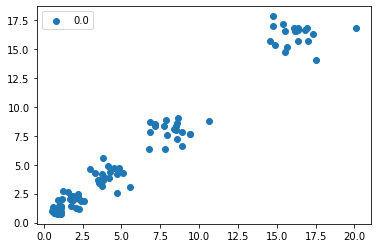

In [196]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

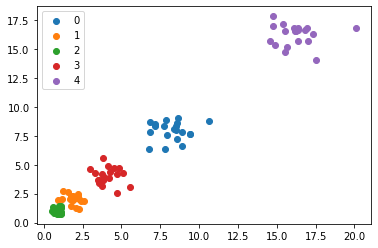

In [197]:
cluster_labels, initial_centers, final_centers = KMeans(points, K)
plot_clusters(points, cluster_labels, show_annotation=False)

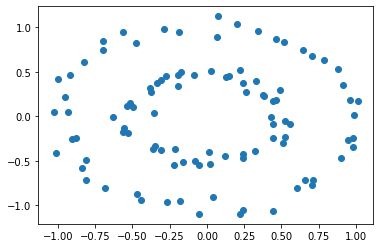

In [198]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
plt.scatter(points[:,0], points[:,1])
plt.show()

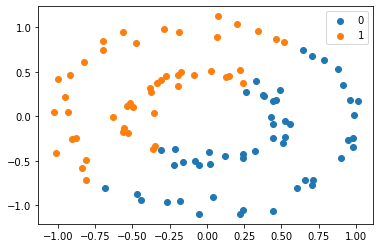

In [199]:
cluster_labels, initial_centers, final_centers = KMeans(points, 2)
plot_clusters(points, cluster_labels, show_annotation=False)

## Task 1
**Task**: Take average after multiple initialisations.  
**Observation**: After multiple runs, their outputs seem about the same. Outputs are not consistent and give similar results as without average.  

In [0]:
def KMeans_avg(points, k):
  cluster_labels = np.zeros((points.shape[0]))
  
  # taking average here
  cluster_centers = initialise(points, k)
  if n > 1:
    cluster_centers += cluster_centers_avg
    cluster_centers /= n

  initial_centers = cluster_centers.copy()
  old_cluster_centers = np.zeros(cluster_centers.shape)

  while not (old_cluster_centers == cluster_centers).all():
    old_cluster_centers = cluster_centers.copy()
    cluster_labels = assign(points, cluster_centers)
    cluster_centers = recalculate_cluster_centers(points, cluster_labels, k)
  
  return cluster_labels, initial_centers, cluster_centers

In [0]:
# Testing
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

points = np.vstack(X)
# plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

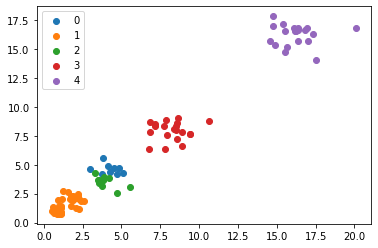

In [202]:
n = 1
cluster_centers_avg = None

for i in range(100):
  cluster_labels, initial_centers, final_centers = KMeans_avg(points, K)
  if n > 1:
    cluster_centers_avg += final_centers
  else:
    cluster_centers_avg = final_centers
  n += 1
plot_clusters(points, cluster_labels, show_annotation=False)

## Task 2
**Task**: Convert concentric circle example to $r,\theta$ space.  
**Observation**: Needed to do feature modification by multiplying r by 10 to get results.

In [0]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
points_rt = []  # r theta
for i in points:
  r = math.sqrt(i[0]**2 + i[1]**2)
  t = math.atan(i[1]/i[0])
  points_rt.append([10*r, t])
points = np.array(points_rt)

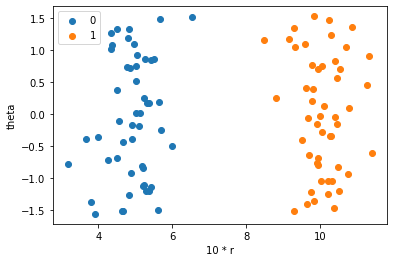

In [204]:
cluster_labels, initial_centers, final_centers = KMeans(points, 2)
plot_clusters(points, cluster_labels, show_annotation=False)
plt.xlabel('10 * r')
plt.ylabel('theta')
plt.show()